In [1]:
import pandas as pd

# Load your data
df = pd.read_csv('BankNotesDataset.csv')

# Perform the split operation on the 'Denomination' column, splitting only at the first underscore
temp_df = df['Denomination'].str.split('_', n=1, expand=True)
temp_df.columns = ['New_Denomination', 'Orientation']

# Convert the new columns to the appropriate type
temp_df['New_Denomination'] = temp_df['New_Denomination'].astype(int)
temp_df['Orientation'] = temp_df['Orientation'].astype(int)

# Append these new columns to the original DataFrame after dropping the original 'Denomination' column
df = pd.concat([df.drop('Denomination', axis=1), temp_df], axis=1)

# Rename 'New_Denomination' to 'Denomination'
df.rename(columns={'New_Denomination': 'Denomination'}, inplace=True)

# Print the updated DataFrame to verify the changes
print("Updated DataFrame with new columns:")
print(df.columns)
df

Updated DataFrame with new columns:
Index(['Unnamed: 0', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8',
       ...
       'v_249', 'v_250', 'v_251', 'v_252', 'v_253', 'v_254', 'v_255',
       'Currency', 'Denomination', 'Orientation'],
      dtype='object', length=260)


,Unnamed: 0,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_249,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination,Orientation
0,0,0.000000,0.802783,4.799193,3.520272,3.906448,2.964886,2.276473,0.472117,0.000000,...,5.005167,5.144637,0.000000,0.717125,0.000000,4.724614,0.000000,AUD,100,1
1,1,1.282011,0.169436,4.367540,4.476254,5.645983,2.173897,0.638572,0.000000,0.149849,...,4.548221,2.671707,0.000000,0.317925,0.000000,2.648906,0.656381,AUD,100,1
2,2,1.956406,0.000000,5.244660,3.611655,5.085964,3.766434,0.000000,1.865016,2.853455,...,6.429610,2.465012,0.000000,0.197883,0.000000,0.823947,1.539916,AUD,100,1
3,3,0.382722,3.727718,4.409414,3.093557,6.277169,0.000000,1.368437,0.000000,1.095514,...,4.439319,0.273129,0.438889,2.423372,0.000000,1.724243,0.000000,AUD,100,1
4,4,0.619588,0.071276,3.780865,3.637381,4.144943,3.829269,0.811821,0.387360,1.005720,...,6.559031,4.807416,0.017139,0.000000,0.000000,2.969594,0.000000,AUD,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24821,24821,0.000000,4.031199,1.723092,0.000000,6.442389,0.000000,2.103125,0.000000,4.195726,...,2.185526,0.000000,1.456413,0.000000,2.568600,2.926563,0.256091,USD,5,2
24822,24822,0.000000,5.881343,1.253260,0.000000,7.237010,0.000000,2.249296,0.000000,4.422322,...,1.557104,0.000000,1.581869,0.000000,2.739777,3.979713,0.000000,USD,5,2
24823,24823,0.434425,2.594997,1.833980,1.889620,3.279485,0.000000,0.648138,0.000000,2.740912,...,1.122540,0.000000,0.000000,0.007719,0.395519,1.304894,0.000000,USD,5,2
24824,24824,0.336723,2.231195,1.207071,0.176062,5.597505,0.000000,0.705511,0.000000,3.978194,...,0.000000,0.000000,2.722379,0.000000,2.028749,3.820353,0.820772,USD,5,2


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Assume df is your DataFrame loaded and ready

# Function to prepare data, train and evaluate SVM using GridSearchCV for hyperparameter tuning
def train_evaluate_svm(X, y):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Types of kernels (simpler selection)
    'gamma': ['scale', 1]  # Kernel coefficient, simplified options
    }


    # Create SVC with grid search
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=3)
    grid_search.fit(X_train_scaled, y_train)

    # Predict on the test set using the best estimator found
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)

    # Print best parameters
    print("Best parameters:", grid_search.best_params_)

    # Evaluate the classifier
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")

# Select features (exclude all labels)
X = df.drop(['Currency', 'Denomination', 'Orientation'], axis=1)

# Classifier for 'Currency'
print("Results for 'Currency' classifier:")
y_currency = df['Currency']
train_evaluate_svm(X, y_currency)

# Classifier for 'Denomination'
print("Results for 'Denomination' classifier:")
y_denomination = df['Denomination']
train_evaluate_svm(X, y_denomination)

# Classifier for 'Orientation'
print("Results for 'Orientation' classifier:")
y_orientation = df['Orientation']
train_evaluate_svm(X, y_orientation)

Results for 'Currency' classifier:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

         AUD       1.00      1.00      1.00       322
         BRL       0.99      1.00      1.00       441
         CAD       0.98      1.00      0.99       245
         EUR       0.99      0.99      0.99       386
         GBP       1.00      0.97      0.98       211
         IDR       1.00      1.00      1.00       241
         INR       0.97      0.98      0.98       374
         JPY       1.00      1.00      1.00       321
         MXN       0.94      0.97      0.95       218
         MYR       1.00      1.00      1.00       238
         NNR       0.99      0.91      0.95       184
         NZD       0.96      0.99      0.98       222
         PHP       1.00      1.00      1.00       235
         PKR       1.00      0.98      0.99       226
         SGD       0.99      0.99      0.99       200
         TRY   

In [4]:
from sklearn.model_selection import GridSearchCV


def train_evaluate_mlp(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
        'activation': ['relu', 'tanh'],  
        'learning_rate_init': [0.001, 0.01], 
    }

    grid_search = GridSearchCV(MLPClassifier(max_iter=300), param_grid, n_jobs=-1, cv=3)
    grid_search.fit(X_train_scaled, y_train)

    y_pred = grid_search.best_estimator_.predict(X_test_scaled)

    print("Best parameters:", grid_search.best_params_)

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")

X = df.drop(['Currency', 'Denomination', 'Orientation'], axis=1)

print("Results for 'Currency' classifier:")
y_currency = df['Currency']
train_evaluate_mlp(X, y_currency)

print("Results for 'Denomination' classifier:")
y_denomination = df['Denomination']
train_evaluate_mlp(X, y_denomination)

print("Results for 'Orientation' classifier:")
y_orientation = df['Orientation']
train_evaluate_mlp(X, y_orientation)


Results for 'Currency' classifier:
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

         AUD       0.99      0.99      0.99       322
         BRL       0.99      0.99      0.99       441
         CAD       0.99      0.99      0.99       245
         EUR       0.99      0.98      0.99       386
         GBP       0.99      0.97      0.98       211
         IDR       0.99      1.00      0.99       241
         INR       0.95      0.99      0.97       374
         JPY       1.00      0.99      0.99       321
         MXN       0.95      0.97      0.96       218
         MYR       1.00      1.00      1.00       238
         NNR       0.98      0.90      0.94       184
         NZD       0.97      0.98      0.98       222
         PHP       1.00      0.99      0.99       235
         PKR       0.98      0.97      0.98       226
         SGD       0.98      0.9

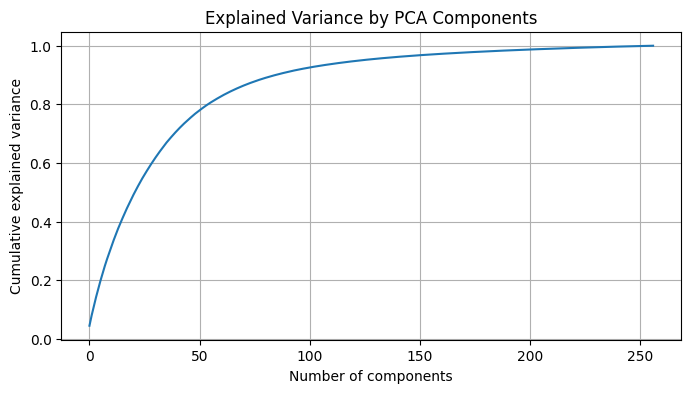

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def explore_pca_variance(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    pca.fit(X_scaled)
    
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.title('Explained Variance by PCA Components')
    plt.grid(True)
    plt.show()


X = df.drop(['Currency', 'Denomination', 'Orientation'], axis=1)

explore_pca_variance(X)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_evaluate_with_pca(X, y, model, params, n_components):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize and train the model with specified parameters
    classifier = model(**params)
    classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test_pca)

    # Print results
    print(f"Results with {n_components} PCA components:")
    print("Best parameters:", params)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")

# PCA components to test
components_list = [50, 100, 150]

# Load your DataFrame here if not already loaded in the same session
# df = ...

# Test models with various numbers of PCA components
for n_components in components_list:
    # SVM and MLP for each label category
    for label in ['Currency', 'Denomination', 'Orientation']:
        y = df[label]
        if label == 'Currency':
            print("SVM for 'Currency':")
            train_evaluate_with_pca(X, y, SVC, {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, n_components)
            print("MLP for 'Currency':")
            train_evaluate_with_pca(X, y, MLPClassifier, {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}, n_components)
        elif label == 'Denomination':
            print("SVM for 'Denomination':")
            train_evaluate_with_pca(X, y, SVC, {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, n_components)
            print("MLP for 'Denomination':")
            train_evaluate_with_pca(X, y, MLPClassifier, {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}, n_components)
        elif label == 'Orientation':
            print("SVM for 'Orientation':")
            train_evaluate_with_pca(X, y, SVC, {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, n_components)
            print("MLP for 'Orientation':")
            train_evaluate_with_pca(X, y, MLPClassifier, {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}, n_components)


SVM for 'Currency':
Results with 50 PCA components:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

         AUD       0.96      0.97      0.97       322
         BRL       0.98      0.98      0.98       441
         CAD       0.98      1.00      0.99       245
         EUR       0.97      0.98      0.98       386
         GBP       0.94      0.93      0.94       211
         IDR       1.00      1.00      1.00       241
         INR       0.93      0.94      0.94       374
         JPY       0.99      0.99      0.99       321
         MXN       0.92      0.94      0.93       218
         MYR       1.00      1.00      1.00       238
         NNR       0.92      0.83      0.87       184
         NZD       0.94      0.97      0.96       222
         PHP       1.00      1.00      1.00       235
         PKR       0.99      0.96      0.98       226
         SGD       0.99      0.99      0.99       20

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Results with 50 PCA components:
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.94       122
           2       0.93      0.92      0.93       169
           5       0.89      0.91      0.90       564
          10       0.94      0.92      0.93       723
          20       0.92      0.90      0.91       696
          50       0.92      0.93      0.92       741
         100       0.92      0.92      0.92       728
         200       0.94      0.93      0.93       334
         500       0.88      0.91      0.89       142
        1000       0.96      0.93      0.94       240
        2000       0.93      0.95      0.94       177
        5000       0.98      0.95      0.96       169
       10000       0.96      0.98      0.97        49
       20000       0.95      0.97      0.96        40
       50000       1.00      1.00  

## Combine labels in one label

In [11]:
df['combined_label'] = df['Currency'].astype(str) + '_' + df['Denomination'].astype(str) + '_' + df['Orientation'].astype(str)

combined_df = df.drop(['Currency', 'Denomination', 'Orientation'], axis=1)

print("New combined DataFrame preview:")
combined_df.head()  


New combined DataFrame preview:


,Unnamed: 0,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,...,v_247,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255,combined_label
0,0,0.000000,0.802783,4.799193,3.520272,3.906448,2.964886,2.276473,0.472117,0.000000,...,1.585952,0.319955,5.005167,5.144637,0.000000,0.717125,0.0,4.724614,0.000000,AUD_100_1
1,1,1.282011,0.169436,4.367540,4.476254,5.645983,2.173897,0.638572,0.000000,0.149849,...,3.286497,0.671412,4.548221,2.671707,0.000000,0.317925,0.0,2.648906,0.656381,AUD_100_1
2,2,1.956406,0.000000,5.244660,3.611655,5.085964,3.766434,0.000000,1.865016,2.853455,...,1.284498,0.434040,6.429610,2.465012,0.000000,0.197883,0.0,0.823947,1.539916,AUD_100_1
3,3,0.382722,3.727718,4.409414,3.093557,6.277169,0.000000,1.368437,0.000000,1.095514,...,2.196379,2.279172,4.439319,0.273129,0.438889,2.423372,0.0,1.724243,0.000000,AUD_100_1
4,4,0.619588,0.071276,3.780865,3.637381,4.144943,3.829269,0.811821,0.387360,1.005720,...,1.230110,0.000000,6.559031,4.807416,0.017139,0.000000,0.0,2.969594,0.000000,AUD_100_1


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

def train_evaluate_classifier(X, y, classifier, param_grid):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Grid Search to find the best parameters and classifier
    grid_search = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=3)
    grid_search.fit(X_train_scaled, y_train)

    # Predict on the test set using the best estimator found
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)

    # Print results
    print("Best parameters:", grid_search.best_params_)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")

# Assume 'df' and 'combined_df' are already defined and loaded
X = combined_df.drop(['combined_label'], axis=1)
y = combined_df['combined_label']

# Parameter grid for MLPClassifier
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}

# Parameter grid for SVC
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 1]
}

# Training and evaluating with MLPClassifier
print("Training with MLPClassifier:")
train_evaluate_classifier(X, y, MLPClassifier(max_iter=300), mlp_param_grid)

# Training and evaluating with SVC
print("Training with SVC:")
train_evaluate_classifier(X, y, SVC(), svm_param_grid)


Training with MLPClassifier:
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.97      0.95        29
   AUD_100_2       0.97      0.95      0.96        40
    AUD_10_1       0.84      0.86      0.85        36
    AUD_10_2       0.81      0.91      0.86        33
    AUD_20_1       0.71      0.63      0.67        27
    AUD_20_2       0.69      0.77      0.73        31
    AUD_50_1       0.94      0.94      0.94        31
    AUD_50_2       0.96      0.93      0.95        29
     AUD_5_1       0.89      0.91      0.90        35
     AUD_5_2       0.93      0.87      0.90        31
   BRL_100_1       0.92      0.95      0.94        38
   BRL_100_2       0.88      0.88      0.88        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       0.97      1.00      0.98        30
   BRL_200_1       0.94      0.97     

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.97      0.95        29
   AUD_100_2       1.00      0.93      0.96        40
    AUD_10_1       0.86      0.89      0.88        36
    AUD_10_2       0.88      0.91      0.90        33
    AUD_20_1       0.64      0.67      0.65        27
    AUD_20_2       0.69      0.65      0.67        31
    AUD_50_1       0.90      0.90      0.90        31
    AUD_50_2       0.93      0.93      0.93        29
     AUD_5_1       0.92      0.94      0.93        35
     AUD_5_2       0.93      0.90      0.92        31
   BRL_100_1       0.95      0.95      0.95        38
   BRL_100_2       0.88      0.94      0.91        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      0.97      0.97        34
   BRL_200_2       1.00      0.97      0.98       

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def train_evaluate_with_pca(X, y, classifier, params, n_components):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize and train the classifier with specified parameters
    classifier.set_params(**params)
    classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test_pca)

    # Print results
    print(f"Results for {n_components} PCA components:")
    print("Best parameters:", params)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("--------------------------------------------------")

# Assume 'combined_df' is already defined and loaded
X = combined_df.drop(['combined_label'], axis=1)
y = combined_df['combined_label']

# PCA components to test
components_list = [50, 100, 150]

# SVM best parameters
svm_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

# MLP best parameters
mlp_params = {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}

# Loop over PCA components and train each classifier
for n_components in components_list:
    print(f"Training with MLPClassifier using {n_components} PCA components:")
    train_evaluate_with_pca(X, y, MLPClassifier(max_iter=300), mlp_params, n_components)
    
    print(f"Training with SVC using {n_components} PCA components:")
    train_evaluate_with_pca(X, y, SVC(), svm_params, n_components)


Training with MLPClassifier using 50 PCA components:
Results for 50 PCA components:
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.84      0.93      0.89        29
   AUD_100_2       0.90      0.88      0.89        40
    AUD_10_1       0.88      0.81      0.84        36
    AUD_10_2       0.86      0.91      0.88        33
    AUD_20_1       0.69      0.74      0.71        27
    AUD_20_2       0.75      0.68      0.71        31
    AUD_50_1       0.90      0.90      0.90        31
    AUD_50_2       0.90      0.93      0.92        29
     AUD_5_1       0.89      0.91      0.90        35
     AUD_5_2       0.84      0.87      0.86        31
   BRL_100_1       0.92      0.95      0.94        38
   BRL_100_2       0.88      0.88      0.88        16
    BRL_10_1       0.96      1.00      0.98        24
    BRL_10_2       1.00      1.00    

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Results for 50 PCA components:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.93      0.93        29
   AUD_100_2       0.97      0.85      0.91        40
    AUD_10_1       0.83      0.83      0.83        36
    AUD_10_2       0.83      0.91      0.87        33
    AUD_20_1       0.59      0.59      0.59        27
    AUD_20_2       0.54      0.61      0.58        31
    AUD_50_1       0.93      0.87      0.90        31
    AUD_50_2       0.93      0.93      0.93        29
     AUD_5_1       0.89      0.89      0.89        35
     AUD_5_2       0.88      0.90      0.89        31
   BRL_100_1       0.90      0.95      0.92        38
   BRL_100_2       0.88      0.94      0.91        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      1.00      0.99        34
   BRL_200_2       

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Results for 100 PCA components:
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.88      0.97      0.92        29
   AUD_100_2       0.92      0.90      0.91        40
    AUD_10_1       0.84      0.86      0.85        36
    AUD_10_2       0.88      0.91      0.90        33
    AUD_20_1       0.64      0.52      0.57        27
    AUD_20_2       0.64      0.68      0.66        31
    AUD_50_1       1.00      0.84      0.91        31
    AUD_50_2       0.88      0.97      0.92        29
     AUD_5_1       0.87      0.94      0.90        35
     AUD_5_2       0.93      0.87      0.90        31
   BRL_100_1       0.95      0.95      0.95        38
   BRL_100_2       0.88      0.94      0.91        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      0.97  

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Results for 100 PCA components:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.97      0.95        29
   AUD_100_2       0.97      0.88      0.92        40
    AUD_10_1       0.89      0.89      0.89        36
    AUD_10_2       0.88      0.91      0.90        33
    AUD_20_1       0.62      0.59      0.60        27
    AUD_20_2       0.59      0.65      0.62        31
    AUD_50_1       0.90      0.90      0.90        31
    AUD_50_2       0.93      0.93      0.93        29
     AUD_5_1       0.89      0.94      0.92        35
     AUD_5_2       0.93      0.90      0.92        31
   BRL_100_1       0.95      0.95      0.95        38
   BRL_100_2       0.88      0.94      0.91        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      0.97      0.97        34
   BRL_200_2      

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Results for 150 PCA components:
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.97      0.95        29
   AUD_100_2       0.95      0.90      0.92        40
    AUD_10_1       0.80      0.89      0.84        36
    AUD_10_2       0.81      0.88      0.84        33
    AUD_20_1       0.64      0.59      0.62        27
    AUD_20_2       0.66      0.68      0.67        31
    AUD_50_1       0.94      0.94      0.94        31
    AUD_50_2       0.90      0.93      0.92        29
     AUD_5_1       0.89      0.97      0.93        35
     AUD_5_2       0.97      0.90      0.93        31
   BRL_100_1       0.88      0.95      0.91        38
   BRL_100_2       0.88      0.88      0.88        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      0.97  

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Results for 150 PCA components:
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification report:
              precision    recall  f1-score   support

   AUD_100_1       0.93      0.97      0.95        29
   AUD_100_2       1.00      0.90      0.95        40
    AUD_10_1       0.86      0.89      0.88        36
    AUD_10_2       0.91      0.91      0.91        33
    AUD_20_1       0.61      0.63      0.62        27
    AUD_20_2       0.63      0.61      0.62        31
    AUD_50_1       0.90      0.90      0.90        31
    AUD_50_2       0.93      0.93      0.93        29
     AUD_5_1       0.89      0.97      0.93        35
     AUD_5_2       0.93      0.90      0.92        31
   BRL_100_1       0.95      0.95      0.95        38
   BRL_100_2       0.88      0.94      0.91        16
    BRL_10_1       1.00      1.00      1.00        24
    BRL_10_2       1.00      1.00      1.00        30
   BRL_200_1       0.97      0.97      0.97        34
   BRL_200_2      

/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/msi-dhade33/.virtualenvs/CaseStudy2AiLab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr